##### https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb

Step 1: Getting and setting up the data. 

Step 2: Visualizing current data. 

Step 3: The mathematics behind the Least Squares Method. 

Step 4: Using Numpy for a Univariate Linear Regression. 

Step 5: Getting the error. 

Step 6: Using scikit learn to implement a multivariate regression. 

Step 7: Using Training and Validation.   

Step 8: Predicting Prices 

Step 9 : Residual Plots 

#### Step 1: Getting and setting up the data.
#### Step 2: Visualizing current data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# load boston dataset from scikit learn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

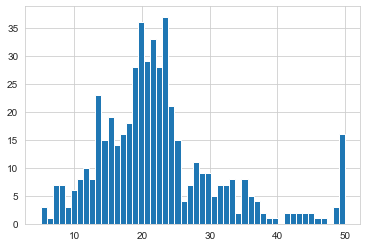

In [5]:
# quick visualization
plt.hist(boston.target, bins = 50)

Text(0, 0.5, 'Number of house')

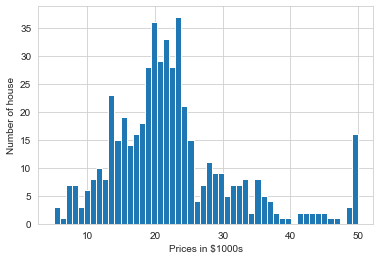

In [6]:
# quick visualization
# histagram of prices(target)
plt.hist(boston.target, bins = 50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of house')

Text(0.5, 0, 'Numer of rooms')

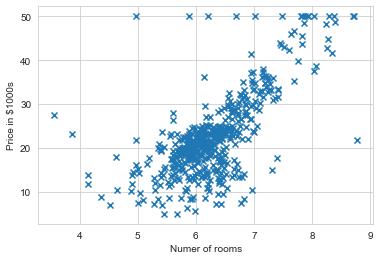

In [7]:
# - RM       average number of rooms per dwelling
# RM is label
# RM is placed in index number 5
plt.scatter(boston.data[:,5], boston.target, marker = 'x')

plt.ylabel('Price in $1000s')
plt.xlabel('Numer of rooms')

# we can see the positive correlationship between x and y

In [8]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# create Price feature
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


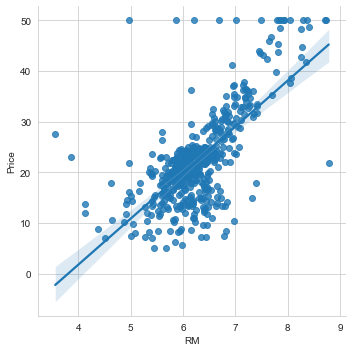

In [10]:
# find the linear fit line (by sns.lmplot)
# RM (# of rooms) vs Price
sns.lmplot('RM', 'Price', data = boston_df)

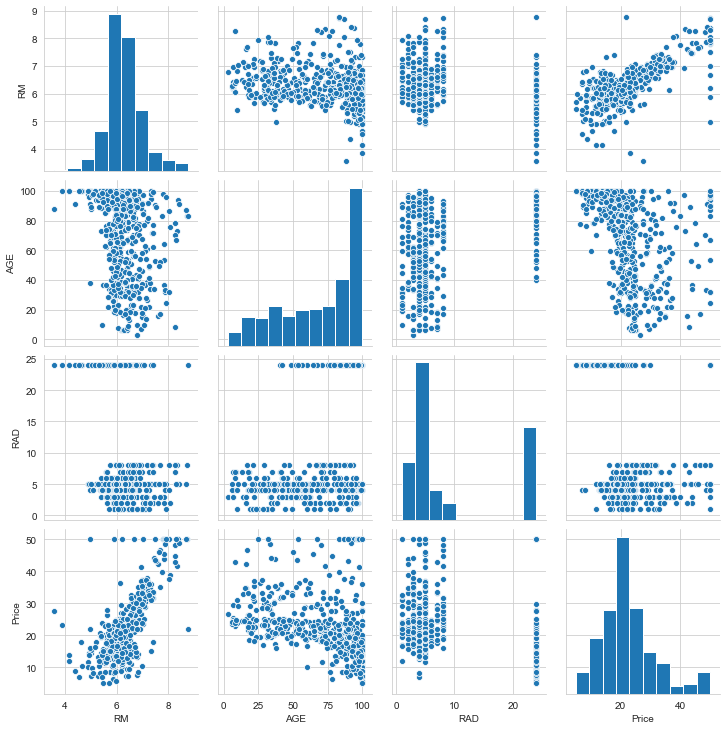

In [11]:
cols = ["RM", "AGE", "RAD", "Price"]
sns.pairplot(boston_df[cols])
plt.show()

#### Step 3: The mathematics behind the Least Squares Method.

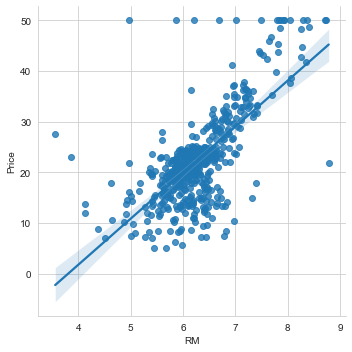

In [12]:
# how can we find best fit line?
sns.lmplot('RM', 'Price', data = boston_df)

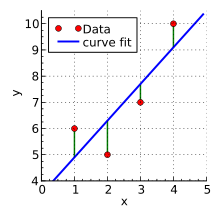

In [13]:
# Quick display of image form wikipedia
# way to find best fit line
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

https://www.youtube.com/watch?v=Qa2APhWjQPc

#### Step 4: Using Numpy for a Univariate Linear Regression.

In [14]:
X = boston_df.RM
X.shape

(506,)

In [15]:
# make like [X, 1] for the matrix
# y = ax + b = A(matrix)x
A = np.vstack([X, np.ones(len(X))]).T

In [16]:
Y = boston_df.Price

In [17]:
m , b = np.linalg.lstsq(A,Y , rcond=None)[0]
# linalg: linear algebra
# Fit a line, y = mx + b, through some noisy data-points:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html

# lstsq: least square

In [18]:
print(m,b)

9.102108981180312 -34.67062077643856


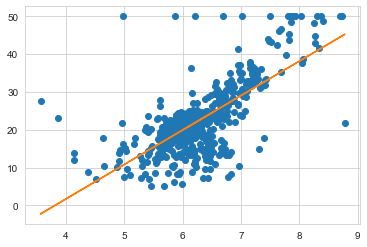

In [19]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

# using numpy for graph
x = boston_df.RM

plt.plot(x, m*x + b, label = 'Best Fit Line')

#### Step 5: Getting the error.

In [29]:
# normal distribution is kind of range error.
# most of target is near or on the linear prediction line.
# only a few of target is located on the far side of the prediction line

result = np.linalg.lstsq(A,Y)

error_total = result[1]

# root mean square error
rmse = np.sqrt(error_total/len(A))

C:\Users\lonj7\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [30]:
rmse = rmse[0]
print("The root mean square error was ", rmse)

The root mean square error was  6.6030713892225625


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

#### Step 6: Using scikit learn to implement a multivariate regression.

Check this link!
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [31]:
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
lreg = LinearRegression()
#Linear Regression

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2).
- https://en.wikipedia.org/wiki/Coefficient_of_determination
- if R^2 = 1, then perfect linear

In [35]:
# Data column
X_multi = boston_df.drop('Price', axis = 1)

# Target column
Y_target = boston_df.Price

In [36]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of of coefficients used was ', len(lreg.coef_))

 The estimated intercept coefficient is 36.46 
 The number of of coefficients used was  13


So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients.

$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$
Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression


In [45]:
coeff_df = pd.DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimated'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimated
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


#### Step 6: Using scikit learn to implement a multivariate regression.